In [19]:
%pylab inline
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

Populating the interactive namespace from numpy and matplotlib
Automatically created module for IPython interactive environment


In [17]:
n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)
latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))
X_train = X[:n / 2]
Y_train = Y[:n / 2]
X_test = X[n / 2:]
Y_test = Y[n / 2:]
print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Corr(X)
[[ 1.    0.48  0.07  0.07]
 [ 0.48  1.    0.03  0.07]
 [ 0.07  0.03  1.    0.48]
 [ 0.07  0.07  0.48  1.  ]]
Corr(Y)
[[ 1.    0.53 -0.01 -0.02]
 [ 0.53  1.    0.01  0.01]
 [-0.01  0.01  1.    0.52]
 [-0.02  0.01  0.52  1.  ]]


/home/jay/anaconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jay/anaconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jay/anaconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jay/anaconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


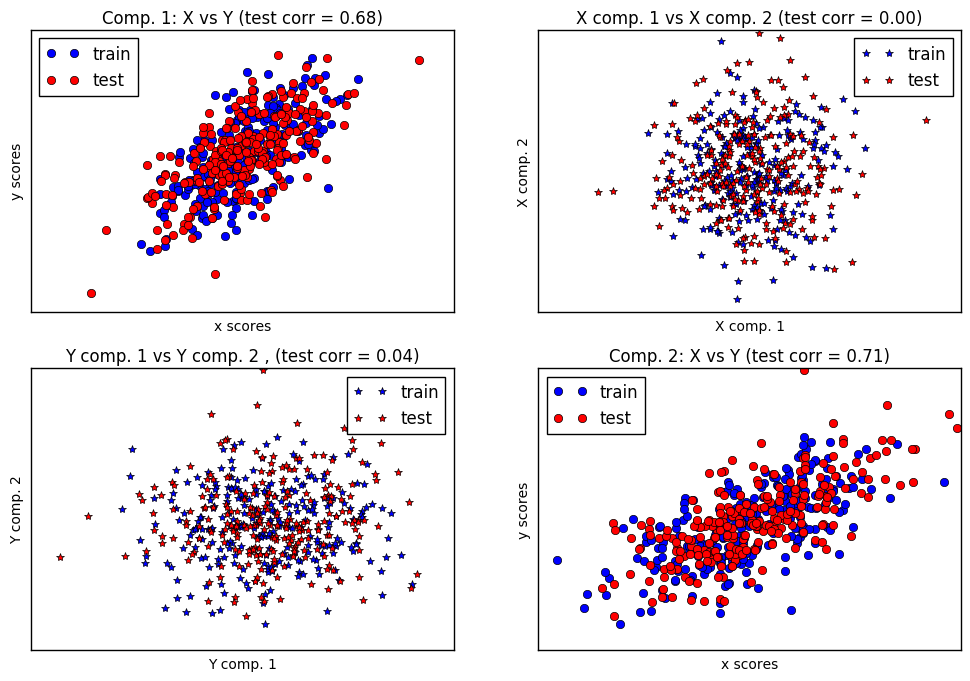

In [29]:
# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(X_train_r[:, 0], Y_train_r[:, 0], "ob", label="train")
plt.plot(X_test_r[:, 0], Y_test_r[:, 0], "or", label="test")
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.plot(X_train_r[:, 1], Y_train_r[:, 1], "ob", label="train")
plt.plot(X_test_r[:, 1], Y_test_r[:, 1], "or", label="test")
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.plot(X_train_r[:, 0], X_train_r[:, 1], "*b", label="train")
plt.plot(X_test_r[:, 0], X_test_r[:, 1], "*r", label="test")
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.plot(Y_train_r[:, 0], Y_train_r[:, 1], "*b", label="train")
plt.plot(Y_test_r[:, 0], Y_test_r[:, 1], "*r", label="test")
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

In [41]:
n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
Y_p = pls2.predict(X)

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   0.9  1. ]
 [ 1.9  2.   2. ]
 [-0.   0.1 -0. ]
 [ 0.  -0.   0. ]
 [-0.  -0.  -0. ]
 [ 0.  -0.   0. ]
 [-0.  -0.  -0. ]
 [-0.1 -0.  -0.1]
 [-0.   0.  -0. ]
 [ 0.   0.   0. ]]


In [42]:
print(Y)
print(Y_p)

[[ 5.57852125  4.95979466  7.32658973]
 [ 7.03437891  6.80221165  6.13672573]
 [ 5.6132917   6.89502345  7.59888615]
 ..., 
 [ 6.78120171  6.53455098  6.41890588]
 [ 2.61492603  5.94189884  3.84538029]
 [ 3.83692429  4.1231129   3.01181612]]
[[ 5.4875332   5.20657174  5.43097364]
 [ 6.74034595  6.90309431  6.72513751]
 [ 6.7649227   6.48239945  6.70734965]
 ..., 
 [ 6.4830643   6.37493649  6.4034282 ]
 [ 3.76914129  3.67569025  3.69090187]
 [ 4.36932656  4.41965462  4.26551569]]
